前置

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
import os
os.chdir("/content/gdrive/My Drive/latia/HW1/") # 切換目錄
!ls -l "/content/gdrive/My Drive/latia/HW1/" # 列出目錄下的檔案

import pandas as pd
import matplotlib.pyplot as plt
csv_file = './大學、技專校院各校退學人數.csv'
df = pd.read_csv(csv_file)
print(df.head())
print(df.info())

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

Mounted at /content/gdrive/
total 20991
-rw------- 1 root root 20659344 Jul  4  2019 TaipeiSansTCBeta-Regular.ttf
-rw------- 1 root root   833757 Apr 18 10:27 大學、技專校院各校退學人數.csv
-rw------- 1 root root      182 Apr 19 07:33 大學、技專校院各校退學人數.gsheet
   學年度  學期 設立別  學校類別 學校統計處代碼    學校名稱     學制班別 性別  在學學生數  退學人數小計  因學業成績退學人數  \
0  105   1  公立  一般大學       1  國立政治大學  學士班(日間)  男  3,912      53          6   
1  105   1  公立  一般大學       1  國立政治大學  碩士班(日間)  男  1,808      71          5   
2  105   1  公立  一般大學       1  國立政治大學   碩士在職專班  男    882      24          0   
3  105   1  公立  一般大學       1  國立政治大學      博士班  男    605      30          4   
4  105   1  公立  一般大學       1  國立政治大學  學士班(日間)  女  5,799      58          2   

   因操行成績退學人數  因志趣不合退學人數  因逾期未註冊退學人數  因休學逾期未復學退學人數  因懷孕退學人數  因病退學人數  因工作需求退學人數  \
0          0         12           0            33        0       0          0   
1          0         15           0            49        0       0          0   
2          0          3           0          

Q1. 全國各退學種類與人數？


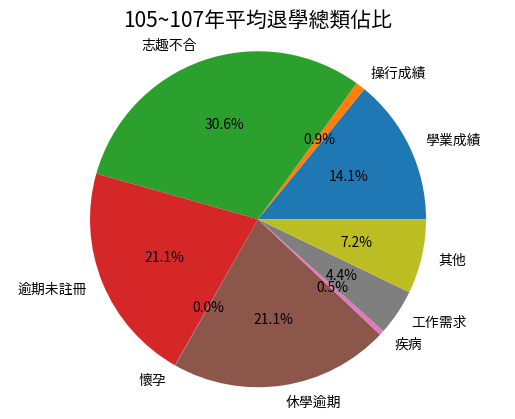

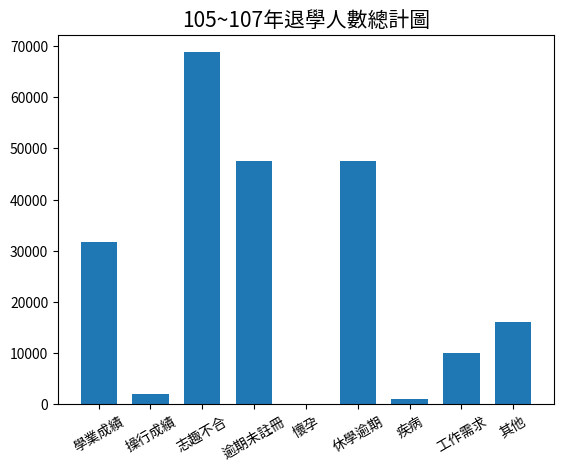

In [ ]:
q1 = df[['因學業成績退學人數','因操行成績退學人數','因志趣不合退學人數','因逾期未註冊退學人數','因懷孕退學人數','因病退學人數','因工作需求退學人數','其他(不含死亡)退學人數']]
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
for i in q1['因學業成績退學人數']:
  a1 = a1 + i
for i in q1['因操行成績退學人數']:
  a2 = a2 + i
for i in q1['因志趣不合退學人數']:
  a3 = a3 + i
for i in q1['因逾期未註冊退學人數']:
  a4 = a4 + i
for i in q1['因懷孕退學人數']:
  a5 = a5 + i
for i in q1['因逾期未註冊退學人數']:
  a6 = a6 + i
for i in q1['因病退學人數']:
  a7 = a7 + i
for i in q1['因工作需求退學人數']:
  a8 = a8 + i
for i in q1['其他(不含死亡)退學人數']:
  a9 = a9 + i

labels_1 = '學業成績','操行成績','志趣不合','逾期未註冊','懷孕','休學逾期','疾病','工作需求','其他'
list_1 = [a1,a2,a3,a4,a5,a6,a7,a8,a9]

#繪製圓餅圖
plt.pie(list_1 , labels = labels_1,autopct='%1.1f%%')  #autopct='%1.1f%%'是用來顯示百分比。
plt.title("105~107年平均退學總類佔比", fontsize=15)
plt.axis('equal')
plt.show()
#繪製直條圖
plt.xticks(rotation = 30)
plt.title("105~107年退學人數總計圖", fontsize=15)
plt.bar(labels_1,list_1,width = 0.7)
plt.show()


Q2 : 各學制退學率？

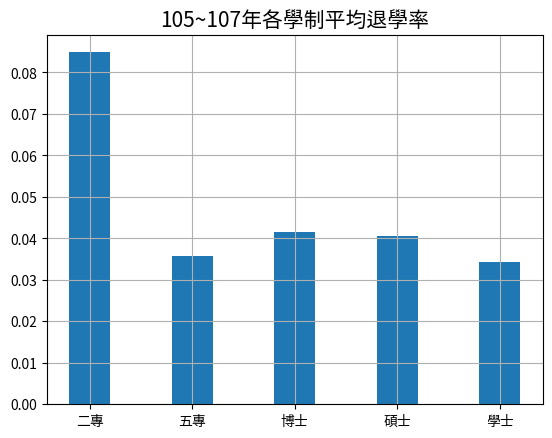

In [14]:
q2 = df[['學制班別','在學學生數','退學人數小計']]

#總數
b1 = 0
b2 = 0
b3 = 0
b4 = 0
b5 = 0

#退學
b1_1 = 0
b2_1 = 0
b3_1 = 0
b4_1 = 0
b5_1 = 0

for i in range(len(q2['學制班別'])):
  if "二專" in q2['學制班別'][i]:
    b1 = b1 + int(q2['在學學生數'][i].replace(',',''))
    b1_1 = b1_1 + q2['退學人數小計'][i]
  elif "五專" in q2['學制班別'][i]:
    b2 = b2 + int(q2['在學學生數'][i].replace(',',''))
    b2_1 = b2_1 + q2['退學人數小計'][i]
  elif "博士" in q2['學制班別'][i]:
    b3 = b3 + int(q2['在學學生數'][i].replace(',',''))
    b3_1 = b3_1 + q2['退學人數小計'][i]
  elif "碩士" in q2['學制班別'][i]:
    b4 = b4 + int(q2['在學學生數'][i].replace(',',''))
    b4_1 = b4_1 + q2['退學人數小計'][i]
  elif "學士" in q2['學制班別'][i]:
    b5 = b5 + int(q2['在學學生數'][i].replace(',',''))
    b5_1 = b5_1 + q2['退學人數小計'][i]


#繪製直條圖
list_2 = [b1_1/b1,b2_1/b2,b3_1/b3,b4_1/b4,b5_1/b5]
labels_2 = ['二專','五專','博士','碩士','學士']
plt.grid([True])
plt.title("105~107年各學制平均退學率", fontsize=15)
plt.bar(labels_2,list_2,width = 0.4)
plt.show()

Q3 : 男女退學人數比較

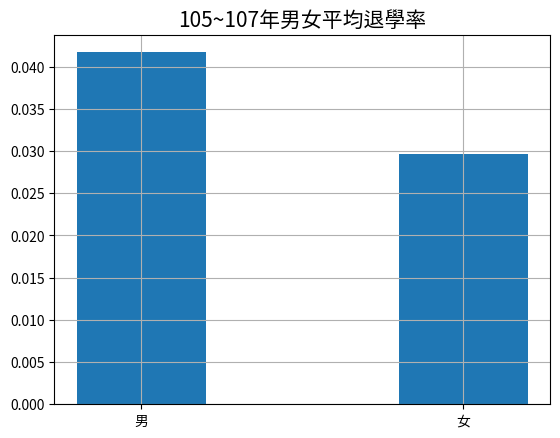

In [ ]:
q3 = df[['性別','在學學生數','退學人數小計']]
q3_1 = q3[q3['性別'] == '男']
q3_2 = q3[q3['性別'] == '女']

#退學變數
c1 = 0
c2 = 0

#學年男女變數
boy = 0
girl = 0

#學生總數
for i in q3_1['在學學生數']:
  boy = boy + int(i.replace(',',''))

for i in q3_2['在學學生數']:
  girl = girl + int(i.replace(',',''))

#退學總數
for i in q3_1['退學人數小計']:
  c1 = c1 + i
for i in q3_2['退學人數小計']:
  c2 = c2 + i

#繪製直條圖
list_3 = [c1/boy,c2/girl]
labels_3 = ['男','女']
plt.grid([True])
plt.title("105~107年男女平均退學率", fontsize=15)
plt.bar(labels_3,list_3,width = 0.4)
plt.show()

Q4 : 公私立退學率

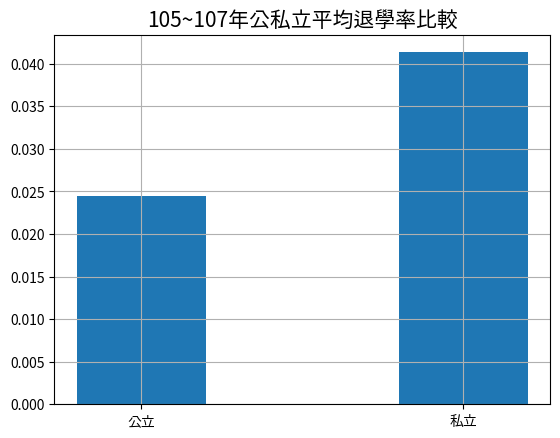

In [ ]:
q4 = df[['設立別','在學學生數','退學人數小計']]

#公私立芬
q4_1 = q4[q4['設立別'] == '公立']
q4_2 = q4[q4['設立別'] == '私立']

#總數變數
d1 = 0
d2 = 0

#退學變數
d1_1 = 0
d2_1 = 0

#學生總數
for i in q4_1['在學學生數']:
  d1 = d1 + int(i.replace(',',''))
for i in q4_2['在學學生數']:
  d2 = d2 + int(i.replace(',',''))

#退學總數
for i in q4_1['退學人數小計']:
  d1_1 = d1_1 + i
for i in q4_2['退學人數小計']:
  d2_1 = d2_1 + i

#繪製直條圖
list_4 = [d1_1/d1,d2_1/d2]
labels_4 = ['公立','私立']
plt.grid([True])
plt.title("105~107年公私立平均退學率比較", fontsize=15)
plt.bar(labels_4,list_4,width = 0.4)
plt.show()

Q5 : 各學年度退學率比較

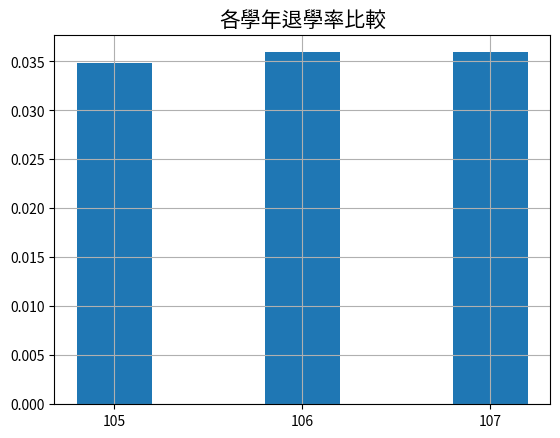

In [ ]:
q5 = df[['學年度','在學學生數','退學人數小計']]

#學年
q5_1 = q5[q5['學年度'] == 105]
q5_2 = q5[q5['學年度'] == 106]
q5_3 = q5[q5['學年度'] == 107]

#學年變數
e1 = 0
e2 = 0
e3 = 0

#學年退學變數
e1_1 = 0
e2_1 = 0
e3_1 = 0

#學生總數
for i in q5_1['在學學生數']:
  e1 = e1 + int(i.replace(',',''))
for i in q5_2['在學學生數']:
  e2 = e2 + int(i.replace(',',''))
for i in q5_3['在學學生數']:
  e3 = e3 + int(i.replace(',',''))

#退學總數
for i in q5_1['退學人數小計']:
  e1_1 = e1_1 + i
for i in q5_2['退學人數小計']:
  e2_1 = e2_1 + i
for i in q5_3['退學人數小計']:
  e3_1 = e3_1 + i

#繪製直條圖
list_5 = [e1_1/e1,e2_1/e2,e3_1/e3]
labels_5 = ['105','106','107']
plt.grid([True])
plt.title("各學年退學率比較", fontsize=15)
plt.bar(labels_5,list_5,width = 0.4)
plt.show()

Q6 : 各學校退學率

0                      國立政治大學
8                      國立清華大學
16                     國立臺灣大學
24                   國立臺灣師範大學
32                     國立成功大學
                ...          
2880                 國立高雄科技大學
3862    學校財團法人中華浸信會基督教台灣浸會神學院
3870         台神學校財團法人台灣神學研究學院
3872                  一貫道崇德學院
6641            台灣基督長老教會南神神學院
Name: 學校名稱, Length: 164, dtype: object
                      學校名稱   在學學生數  退學人數小計
0                   國立政治大學   98136    1704
1                   國立清華大學   99596    1840
2                   國立臺灣大學  190660    3732
3                 國立臺灣師範大學   92630    2281
4                   國立成功大學  127294    3085
..                     ...     ...     ...
159               國立高雄科技大學  109188    2743
160  學校財團法人中華浸信會基督教台灣浸會神學院     116       2
161       台神學校財團法人台灣神學研究學院     294       1
162                一貫道崇德學院     156       2
163          台灣基督長老教會南神神學院      94       0

[164 rows x 3 columns]


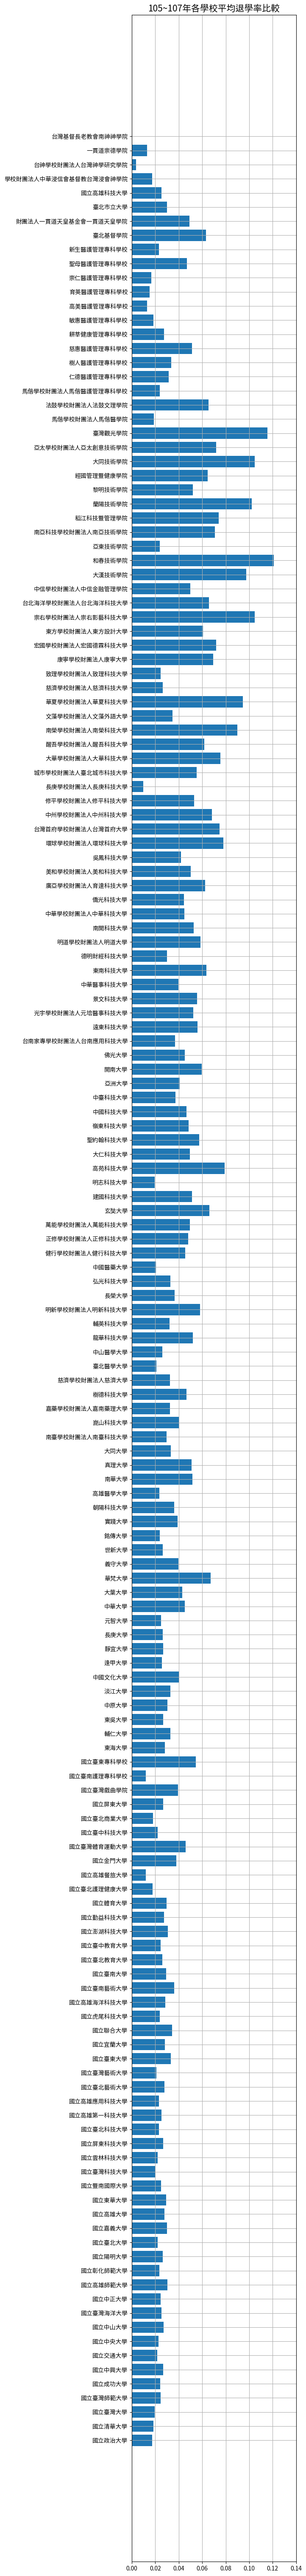

In [13]:
q6 = df[['學校名稱','在學學生數','退學人數小計']]
f2 = 0
df2 = df.drop_duplicates('學校名稱')
print(df2['學校名稱'])

f1 = pd.DataFrame({'學校名稱': [], '在學學生數': [], '退學人數小計': []})
#儲存列表
list6_1 = []
list6_2 = []
list6_3 = []
for i in df2['學校名稱']:
  list6_1.append(i)
  list6_2.append(0)
  list6_3.append(0)
  for j in range(len(q6['學校名稱'])):
    if q6['學校名稱'][j] == i:
      list6_2[f2] = list6_2[f2] + int(q6['在學學生數'][j].replace(',',''))
  for k in range(len(q6['學校名稱'])):
    if q6['學校名稱'][k] == i:
      list6_3[f2] = list6_3[f2] + q6['退學人數小計'][k]
  f2 = f2 + 1
f1['學校名稱'] = list6_1
f1['在學學生數'] = list6_2
f1['退學人數小計'] = list6_3
print(f1)

#繪製直條圖
list_6 = f1['退學人數小計']/f1['在學學生數']
labels_6 = f1['學校名稱']
plt.figure(figsize=(5, 60))
plt.xlim(0,0.14)
plt.barh(labels_6,list_6)
plt.grid([True])
plt.title("105~107年各學校平均退學率比較", fontsize=15)
plt.subplots_adjust(top = 1,bottom = 0)
plt.show()

